In [1]:
from data.dataset import MyDataset

dataset = MyDataset("ml-1m")
print("Succesfully read data!")
dataset.trainTestValidationSplit()
print("Performed data split!")



The links parameter aren't initialized!
Succesfully read data!
Performed data split!


In [2]:
from recommender.model.RBM import RBM
from pprint import pprint
bs = 20

rbm = RBM(
    n_visible=dataset.nItems,
    ratings=5,
    verbose=True,
    #device="cuda",
    n_hidden=100,
    batch_size=bs,
    learning_rate=1e-3,
    early_stopping=True,
    max_epoch=1000,
    patience=5,
)

rbm.save_model_to_file("untrainedRBM.pt")


In [3]:
rbm.fit(dataset)
rbm.fit(dataset, t=3)
rbm.fit(dataset, t=5)
rbm.fit(dataset, t=7)
rbm.fit(dataset, t=9)

#####	--------------------	TRAIN				VALIDATION
Epoch	--------------------	RMSE		MAE		RMSE		MAE
0	##################	1.778292	1.423637	1.477916	1.134386	
1	##################	1.640736	1.299067	1.432470	1.090371	
2	##################	1.594573	1.253147	1.433389	1.092496	
3	##################	1.604999	1.261664	1.423133	1.082271	
4	##################	1.595860	1.255571	1.418315	1.075023	
5	##################	1.584843	1.242739	1.414936	1.078707	
6	##################	1.586283	1.248699	1.397041	1.058137	
7	##################	1.581579	1.239968	1.393113	1.054577	
8	##################	1.577768	1.240296	1.393400	1.060050	
9	##################	1.594043	1.255311	1.392864	1.058219	
10	##################	1.576262	1.240414	1.392646	1.057162	
11	##################	1.566976	1.228333	1.410015	1.068814	
12	##################	1.597597	1.255459	1.395233	1.057386	
13	##################	1.560641	1.224471	1.393054	1.059580	
14	##################	1.587413	1.247434	1.397707	1.060466	
15	##################	1.574870

KeyboardInterrupt: 

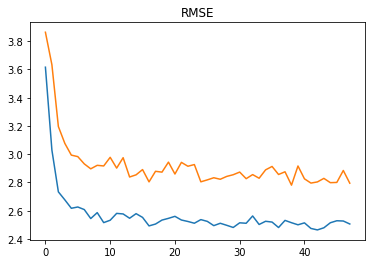

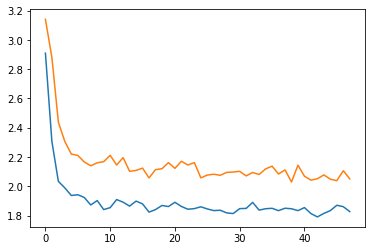

In [4]:
import matplotlib.pyplot as plt

plt.title("RMSE")

plt.plot(rbm.metrics.validRMSE)
plt.plot(rbm.metrics.trainRMSE)
plt.show()
plt.plot(rbm.metrics.validMAE)
plt.plot(rbm.metrics.trainMAE)
plt.show()

In [5]:
rbm.metrics.bestRMSE

{'epoch': 42, 'value': 2.4637257165229265}

In [6]:
rbm.metrics.bestMAE

{'epoch': 42, 'value': 1.7915174318343523}